## Necessary Installations

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...


In [1]:
!wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
!tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2
!cp -r site-packages/* /usr/local/lib/python3.6/dist-packages/

--2021-12-13 19:39:53--  https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.93.24, 104.17.92.24, 2606:4700::6811:5d18, ...
Connecting to anaconda.org (anaconda.org)|104.17.93.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5d019c23c7424a015486440c/5d790a95778a870c42137059?response-content-disposition=attachment%3B%20filename%3D%22tsnecuda-2.1.0-cuda100.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27tsnecuda-2.1.0-cuda100.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20211213T193954Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEGAaCXVzLWVhc3QtMSJHMEUCIHxOvPVF%2BaHuJjdEQm5GH47Uu%2B%2B%2B%2BeKcNl5isrgp6mF2AiEAhD23tRmApqFIDeNBi6h073jH9%2FKI8NXrLcjDxB%2F9f%2BMq%2BgMISBAAGgw0NTU4NjQwOTgzNzgiDFTml0cVWgyCqJsbdyrXAzY77dJSb%2FXzIcsO3mSjBJjwz831p7i

In [2]:
!conda install --offline /content/tsnecuda-2.1.0-cuda100.tar.bz2


100% 1.0/1 [00:05<00:00,  5.86s/it]
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done


In [3]:
import tsnecuda
tsnecuda.test()

# *Problem 2.  Word2vec* 

## *Loading and reading the pretrained word embeddings file (vectors.txt)*


*   The file contains word2vec embeddings for 400K words, and the dimension of each vector is 50. Each line contains  the  word and  its  corresponding vector.  The  first  word in each line  is  the  word,  followed  by  50 
numbers, where each number is a dimension of the vector.



In [4]:
with open('vectors.txt') as f:
    lines = f.readlines()

all_words = {}

for line in lines:
  line = line[:-1]
  line = line.split(" ")
  # Extracting word and vectors
  word = line[0]
  vector = line[1:]
  for i in range(len(vector)):
    vector[i] = float(vector[i])
  # Returns the vector corresponding to the word
  all_words[word] = vector

## 1) *Semantics: Use the pre-trained embeddings file to compute the 20 most similar words using cosine similarity for the following words, and show your work.*   


1.   life
2.   market
3.   Stanford



## Defining a function to get closest words using cosine similarity

In [5]:
import numpy as np
import pandas as pd
from queue import PriorityQueue
from numpy import dot
from numpy.linalg import norm

def similar_20(word):

    word = word.lower()
    # Extracting the element with smallest cosine
    q = PriorityQueue()
    for x in all_words:
        # Cosine Function
        cosine_sim = dot(all_words[x],all_words[word])/(norm(all_words[x])*norm(all_words[word]))
        q.put((cosine_sim,x))
        if(q.qsize() > 21):
          q.get()

    closest = []
    while(q.empty() is False):
      closest.append(np.asarray(q.get())[::-1])
      
    # Making a dataframe
    closest = pd.DataFrame(closest[::-1],columns = ['Words','Cosine Similarity Index'])
    return closest

## 20 most similar words for 'life'

In [7]:
similar_to_life = similar_20('life')['Words']
similar_to_life

0           life
1           mind
2           love
3          lives
4            own
5           kind
6     experience
7          child
8        perhaps
9            she
10         whose
11        indeed
12           her
13          same
14          work
15          true
16           way
17          once
18          fact
19          this
20          much
Name: Words, dtype: object

## 20 most similar words for 'market'

In [8]:
similar_to_market = similar_20('market')['Words']
similar_to_market

0        market
1       markets
2        prices
3         stock
4        buying
5      consumer
6        retail
7        stocks
8         price
9         sales
10     business
11        trend
12         rise
13     industry
14       sector
15    investors
16      trading
17       demand
18      economy
19       higher
20     analysts
Name: Words, dtype: object

## 20 most similar words for 'Stanford'

In [9]:
similar_to_stanford = similar_20('Stanford')['Words']
similar_to_stanford

0       stanford
1           ucla
2        harvard
3           yale
4      princeton
5        rutgers
6     university
7         baylor
8       graduate
9     georgetown
10       cornell
11       fordham
12           asu
13           usc
14            uc
15       hopkins
16           usf
17     professor
18      berkeley
19       college
20     villanova
Name: Words, dtype: object

## *2) Visualization*  

## *a. Create a t-sne visualization, displaying all the words in the file.* 

## Importing 'tsnecuda' and 't-SNE'


In [12]:
import tsnecuda
from tsnecuda import TSNE

## Implementing t-SNE

In [13]:
new_values = TSNE(perplexity = 5, learning_rate = 500).fit_transform(df)

## Preparing the dataframe

In [10]:
df = pd.DataFrame.from_dict(all_words, orient='index')
df = df[:-1]

In [14]:
df['x'] = new_values[:,0]
df['y'] = new_values[:,1]
allx = np.asarray(df['x'])
ally = np.asarray(df['y'])

## Plotting all the words in the file

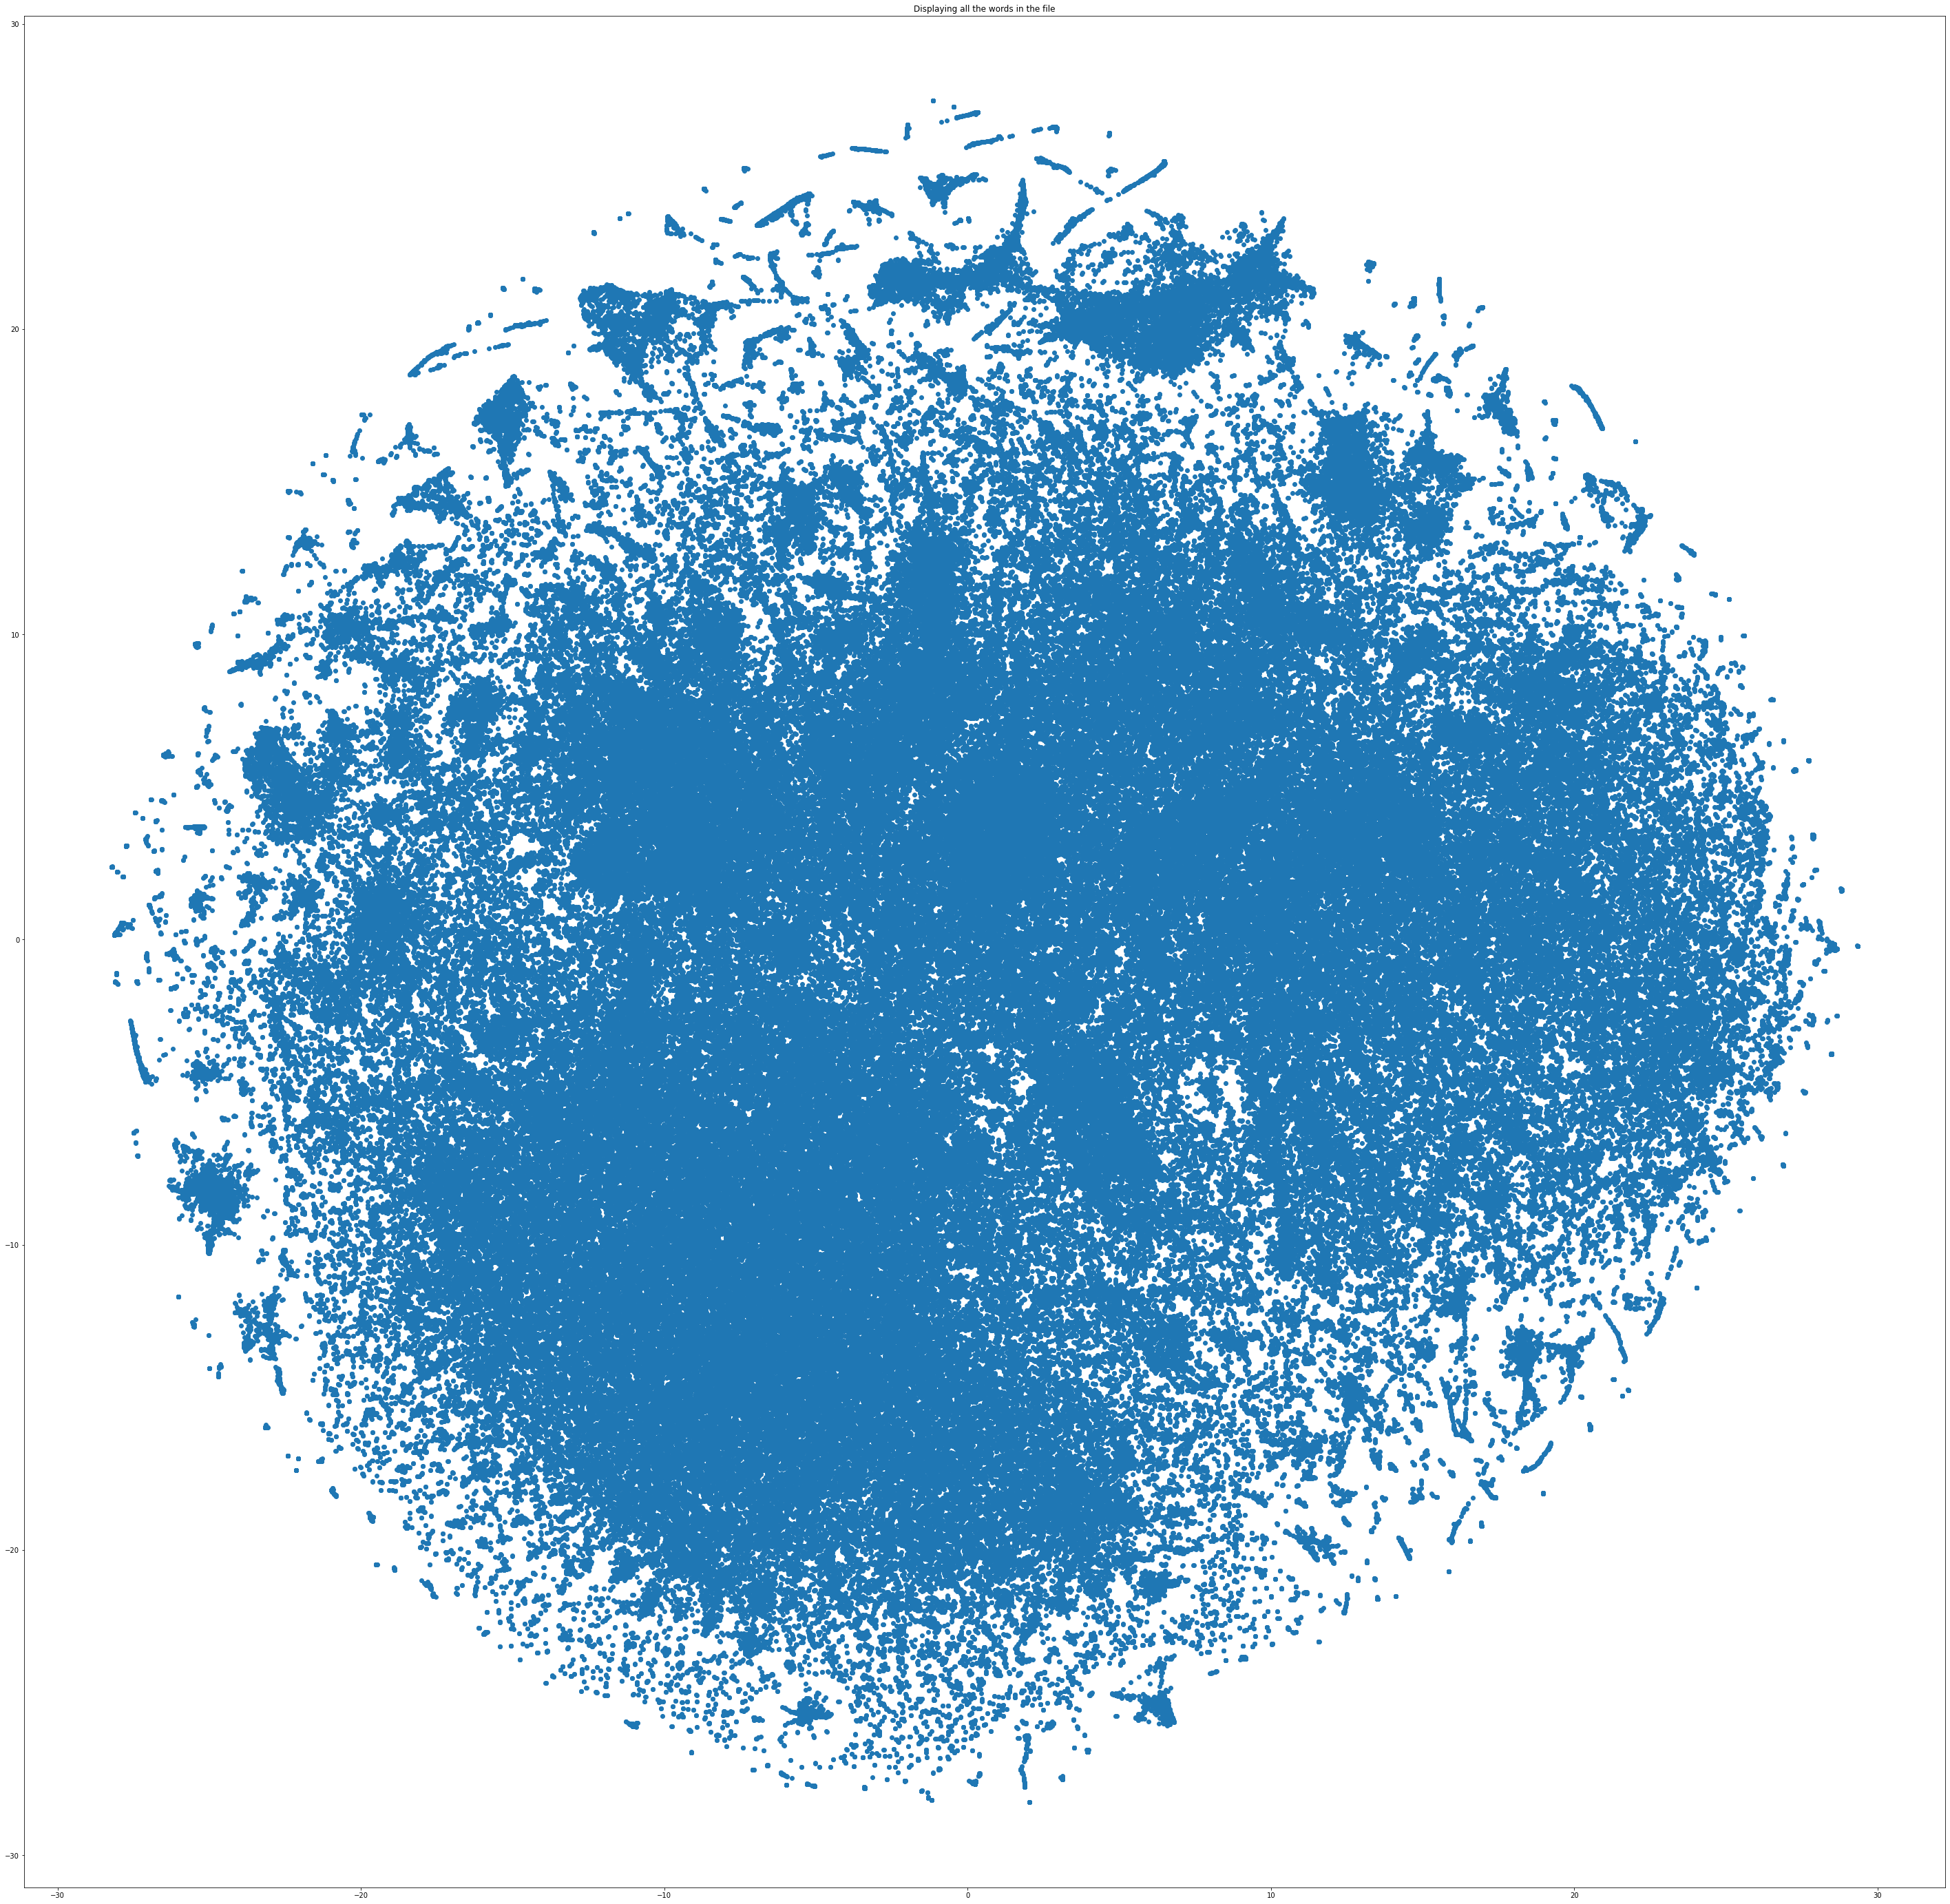

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
plt.scatter(allx,ally)
plt.title("Displaying all the words in the file")
plt.show()

## *b. Use t-sne visualization to display the nearest 20 words for a given word. Create a separate visualization of all the 3 words given in (1), where each visualization displays the nearest 20 words for a word.*

## Plotting 20 most similar words for 'life'

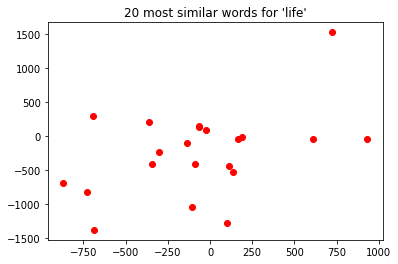

In [17]:
life = np.asarray(similar_to_life)
v_life = []
for x in life:
  v_life.append(np.asarray(all_words[x[0]]))

v_life = pd.DataFrame(v_life)

similar_values_life = TSNE(perplexity = 5).fit_transform(v_life)

v_life['x'] = similar_values_life[:,0]
v_life['y'] = similar_values_life[:,1]

lx = np.asarray(v_life['x'])
ly = np.asarray(v_life['y'])

plt.scatter(lx,ly,color='red')
plt.title("20 most similar words for 'life'")
plt.show()

## Plotting 20 most similar words for 'market'

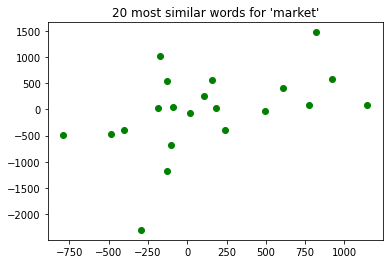

In [22]:
market = np.asarray(similar_to_market)
v_market = []
for x in market:
  v_market.append(np.asarray(all_words[x[0]]))

v_market = pd.DataFrame(v_market)

similar_values_market = TSNE(perplexity = 5).fit_transform(v_market)

v_market['x'] = similar_values_market[:,0]
v_market['y'] = similar_values_market[:,1]

mx = np.asarray(v_market['x'])
my = np.asarray(v_market['y'])

plt.scatter(mx,my,color='green')
plt.title("20 most similar words for 'market'")
plt.show()

## Plotting 20 most similar words for 'Stanford'

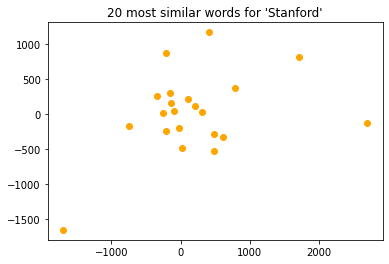

In [23]:
stanford = np.asarray(similar_to_stanford)
v_stanford = []
for x in stanford:
  v_stanford.append(np.asarray(all_words[x[0]]))

v_stanford = pd.DataFrame(v_stanford)

similar_values_stanford = TSNE(perplexity = 5).fit_transform(v_stanford)

v_stanford['x'] = similar_values_stanford[:,0]
v_stanford['y'] = similar_values_stanford[:,1]

sx = np.asarray(v_stanford['x'])
sy = np.asarray(v_stanford['y'])

plt.scatter(sx,sy,color='orange')
plt.title("20 most similar words for 'Stanford'")
plt.show()